#Install setup

a. Install packages

In [ ]:
!pip install tensorflow==2.8.0

     |████████████████████████████████| 497.5 MB 22 kB/s 
     |████████████████████████████████| 462 kB 59.2 MB/s 
     |████████████████████████████████| 15.7 MB 49.4 MB/s 
     |████████████████████████████████| 1.4 MB 51.6 MB/s 
     |████████████████████████████████| 5.8 MB 48.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0
ERROR: pip's dependency resolver does not currently take into account 

b. Import libaries

In [ ]:

import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__)


2.8.0


#Define and compile Neural Network

a. Create simple NN

In [ ]:
model  = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

b. Compile neural network

In [ ]:
model.compile(optimizer="sgd", loss="mean_squared_error")

c. Provide data

In [ ]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# Train the NN

The process of training the neural network, where it 'learns' the relationship between the Xs and Ys is in the model.fit call. 

In [ ]:
model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 368ms/step - loss: 19.1270
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 15.3101
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 12.3018
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 9.9297
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 8.0583
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 6.5810
Epoch 7/500
1/1 [==============================] - 0s 13ms/step - loss: 5.4137
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 4.4905
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 3.7594
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 3.1796
Epoch 11/500
1/1 [==============================] - 0s 8ms/step - loss: 2.7188
Epoch 12/500
1/1 [==============================] - 0s 8ms/step - loss: 2.3519
Epoch 13/500
1/1 [==============================] -

# Make prediction

In [ ]:
# If X is 10. What will Y be? - My guess: 19
print(model.predict([10.0]))

# If X is 15. What will Y be? - My guess: 29
print(model.predict([15.0]))

[[18.980824]]
[[28.966927]]


You might have thought 19, right? But it ended up being a little under. Why do you think that is?

Remember that neural networks deal with probabilities, so given the data that we fed the NN with, it calculated that there is a very high probability that the relationship between X and Y is Y=2X-1, but with only 6 data points we can't know for sure. As a result, the result for 10 is very close to 19, but not necessarily 19.

As you work with neural networks, you'll see this pattern recurring. You will almost always deal with probabilities, not certainties, and will do a little bit of coding to figure out what the result is based on the probabilities, particularly when it comes to classification.

# Computer Vision (Example)

a. Load data

In [ ]:
#Call dataset API from keras with Fashion MNIST data
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
#Load and split dataset into training_images, training_labels, test_images and test_labels
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

b. Visualize data

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

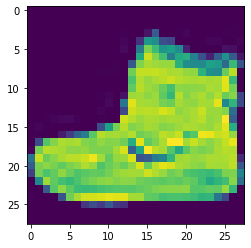

In [ ]:
#What does these values look like? Let's print a training image, and a training label to see..
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=200)
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0]) 

You see the numbers of the picture are between 0 and 255. It is easier for the NN to work with the data between 0 and 1. This is why we will transform the data. This process is called: normalizing. 

In [ ]:
#Normalize Data
training_images = training_images/255.0
test_images = test_images/255.0

In [ ]:
#Design model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
#Build model
model.compile(optimizer = tf.optimizers.Adam(),
              loss = "sparse_categorical_crossentropy",
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4958 - accuracy: 0.8267
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3745 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3357 - accuracy: 0.8776
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3119 - accuracy: 0.8872
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2945 - accuracy: 0.8902


In [ ]:
#Test model
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3640 - accuracy: 0.8720


[0.36398816108703613, 0.871999979019165]

# Exercise 1

In [ ]:
classifications = model.predict(test_images)
classifications[0]

array([2.8677491e-06, 1.2094906e-08, 3.3795610e-07, 1.5494072e-08, 1.5247439e-07, 2.1072654e-03, 1.1683110e-06, 1.2755827e-02, 5.9507170e-06, 9.8512638e-01], dtype=float32)

In [ ]:
print(test_labels[0])

9


What does this list represent?

The numbers in the array represents the probability of each class in the NN. The higher the probability the higher is the certainty of the NN that the test image is matching with the trained image class. In this case the image label is 9 and the highest probability (98,51%) is on the image class number 9. So we can say, it is correct classifed. 

How do you know that this list tells you that the item is an ankle boot?

9
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.  

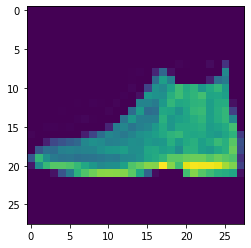

In [ ]:
np.set_printoptions(linewidth=200)
plt.imshow(test_images[0])
print(test_labels[0])
print(test_images[0])

# Exercise 2

Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?